In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_dir = '/content/drive/MyDrive/ProjetCV'

In [19]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(my_dir, validation_split=0.2,subset='training',seed=123, image_size=(224, 224), batch_size = 16)
test_data = tf.keras.preprocessing.image_dataset_from_directory(my_dir, validation_split=0.2, subset='validation', seed=123,image_size=(224, 224),batch_size= 16 )

Found 11737 files belonging to 18 classes.
Using 9390 files for training.
Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


In [20]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

In [21]:
preproc = Sequential(name = 'preproc')

preproc.add(RandomFlip("horizontal_and_vertical", input_shape=(224,224,3)))
preproc.add(RandomRotation(0.2))
preproc.add(RandomZoom(0.1))

In [22]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Normalization, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model

In [27]:
def mymodel():
  model = Sequential()

  mn_model = MobileNet(input_shape=(224,224,3), weights="imagenet",include_top=False)
  model.add(preproc)
  model.add(mn_model)

  model.add(GlobalAveragePooling2D())
  model.add(BatchNormalization())
  model.add(Dense(units=1024, activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(units=1024, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(18, activation="sigmoid"))

  model.compile(
        optimizer= 'Adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

  return model

In [28]:
the_model = mymodel()
the_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preproc (Sequential)        (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                      

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
stop_early = EarlyStopping(
    monitor="val_accuracy",
    patience=15,
    mode ="max",
    verbose=2,
    restore_best_weights=True
)

In [31]:
res = the_model.fit (
    train_data,
    validation_data=test_data,
    epochs=200,
    verbose=1,
    callbacks=[stop_early]
)

Epoch 1/200
587/587 [==============================] - 52s 60ms/step - loss: 2.0467 - accuracy: 0.4037 - val_loss: 3.6385 - val_accuracy: 0.2927
Epoch 2/200
587/587 [==============================] - 34s 58ms/step - loss: 1.5090 - accuracy: 0.5641 - val_loss: 2.7354 - val_accuracy: 0.3980
Epoch 3/200
587/587 [==============================] - 34s 58ms/step - loss: 1.2557 - accuracy: 0.6445 - val_loss: 1.7321 - val_accuracy: 0.5871
Epoch 4/200
587/587 [==============================] - 35s 58ms/step - loss: 1.1336 - accuracy: 0.6813 - val_loss: 2.0347 - val_accuracy: 0.5914
Epoch 5/200
587/587 [==============================] - 35s 58ms/step - loss: 0.9750 - accuracy: 0.7235 - val_loss: 1.4262 - val_accuracy: 0.6489
Epoch 6/200
587/587 [==============================] - 34s 58ms/step - loss: 0.9552 - accuracy: 0.7353 - val_loss: 1.4859 - val_accuracy: 0.6562
Epoch 7/200
587/587 [==============================] - 34s 58ms/step - loss: 0.8664 - accuracy: 0.7613 - val_loss: 1.0727 - val_ac

In [34]:
from tensorflow.keras.models import save_model
import numpy as np

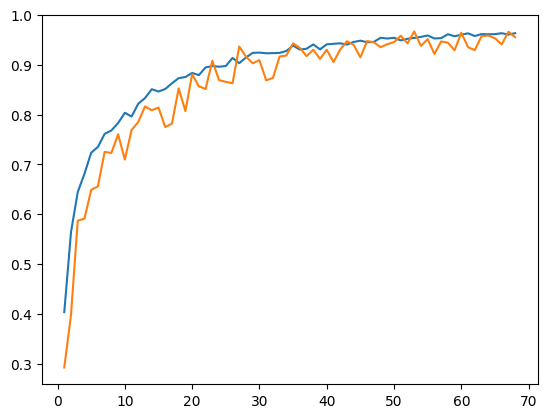

In [37]:
plt.plot(np.arange(1, 69,1), res.history['accuracy'])
plt.plot(np.arange(1, 69,1), res.history['val_accuracy'])
plt.show()

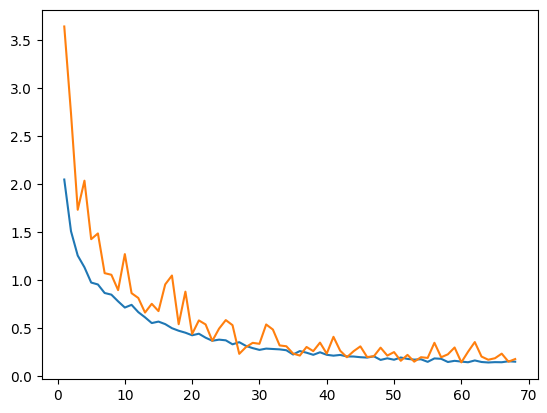

In [38]:
plt.plot(np.arange(1, 69,1), res.history['loss'])
plt.plot(np.arange(1, 69,1), res.history['val_loss'])
plt.show()

In [39]:
save_model(the_model, '/content/drive/MyDrive/models/op_model')